## Comparacion de SVM y una NN de resultados de clasificacion a partir de datos aumentados por oversampling de la categoria minoritaria. 

In [174]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
df=pd.read_csv('../mixed_data/prepared_train_data.csv')
df.set_index('Id', inplace=True)

In [175]:
df, df_test = train_test_split(
    df,
    test_size=0.2,
    stratify=df['highGrade'],  # mantiene la proporción de clases"?
    random_state=51
)

In [176]:
import pandas as pd
from scipy.stats import ttest_ind

# Filtra solo los registros donde highGrade es False
df_filtered = df[df['highGrade'] == False]

# Divide el DataFrame filtrado por sesBase (True y False)
group_true = df_filtered[df_filtered['esBase'] == True]
group_false = df_filtered[df_filtered['esBase'] == False]

# Selecciona solo las columnas numéricas (ignorando columnas categóricas u object)
numeric_cols = df_filtered.select_dtypes(include='number').columns

# Elimina las columnas 'highGrade' y 'sesBase' de la comparación
numeric_cols = numeric_cols.drop(['highGrade', 'esBase'], errors='ignore')

# Diccionario para almacenar resultados
results = []

for col in numeric_cols:
    mean_true = group_true[col].mean()
    mean_false = group_false[col].mean()
    t_stat, p_val = ttest_ind(group_true[col], group_false[col], equal_var=False, nan_policy='omit')
    
    results.append({
        'feature': col,
        'mean_esBase_True': mean_true,
        'mean_esBase_False': mean_false,
        'difference': abs(mean_true - mean_false),
        'p_value': p_val
    })

# Convertir a DataFrame para visualizar
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='difference', ascending=False)

# Mostrar las columnas con mayor diferencia
print(results_df.head(20))  # o usa display(results_df) si estás en Jupyter


                                    feature  mean_esBase_True  \
10          TotalEnergy/firstorder/original      1.251749e+09   
3     BoundingBox/Mask-original/diagnostics      6.408789e+03   
12       VoxelNum/Mask-original/diagnostics      4.505632e+03   
2          90Percentile/firstorder/original      3.132316e+02   
7                Median/firstorder/original      2.383158e+02   
9       RootMeanSquared/firstorder/original      2.462397e+02   
6                  Mean/firstorder/original      2.386023e+02   
1          10Percentile/firstorder/original      1.699895e+02   
8               Minimum/firstorder/original      4.105263e+01   
0                                Unnamed: 0      5.026316e+01   
5     GrayLevelNonUniformity/glrlm/original      2.396631e+02   
14  x.BoundingBox/Mask-original/diagnostics      1.218421e+02   
15  y.BoundingBox/Mask-original/diagnostics      1.025789e+02   
13            ZonePercentage/glszm/original      1.357572e-01   
4                 Coarsen

/home/luis/anaconda3/envs/pdg_env/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:586: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [177]:
'''df_true = df[df['highGrade'] == True]
df_false = df[df['highGrade'] == False]

test_size = int(0.2 * len(df))
half_test_size = test_size // 2

test_true = df_true.sample(n=half_test_size, random_state=42)
test_false = df_false.sample(n=half_test_size, random_state=42)

df_test = pd.concat([test_true, test_false]) 

df = df.drop(df_test.index)

print("DATASET TRAINING: ", len(df), " REGISTROS")

print("DATASET TESTING: ", len(df_test), " REGISTROS")'''

'df_true = df[df[\'highGrade\'] == True]\ndf_false = df[df[\'highGrade\'] == False]\n\ntest_size = int(0.2 * len(df))\nhalf_test_size = test_size // 2\n\ntest_true = df_true.sample(n=half_test_size, random_state=42)\ntest_false = df_false.sample(n=half_test_size, random_state=42)\n\ndf_test = pd.concat([test_true, test_false]) \n\ndf = df.drop(df_test.index)\n\nprint("DATASET TRAINING: ", len(df), " REGISTROS")\n\nprint("DATASET TESTING: ", len(df_test), " REGISTROS")'

### Oversampling

Este metodo duplica registros de la clase minoritaria aletaoriamente hasta llegar a balancear el dataset. En este caso buscamos un balance del 50/50.
Esto lo logra calculando la relacion entre high y low grades, para luego aplicar esta relacion a la hora de seleccionar registros para el dataset resultante.        

In [178]:
''' 
indices_0 = df[df['highGrade'] == False].index  
indices_1 = df[df['highGrade'] == True].index   
indices = indices_0.union(indices_1)


weight_minority_class = len(indices_1) / len(indices_0)


weights_0 = pd.Series(weight_minority_class, index=indices_0)
weights_1 = pd.Series(1.0, index=indices_1)
weights = pd.concat([weights_0, weights_1])
weights = weights / weights.sum()  # Normalizar

sampled_indices = np.random.choice(weights.index, size=len(weights), p=weights.values)


df_oversampled = df.loc[sampled_indices]


positive_frac = round(100 * df_oversampled['highGrade'].mean(), 3)
print(f'Fraction of positive labels in oversampled data: {positive_frac}%')
df_oversampled.mean()'''

" \nindices_0 = df[df['highGrade'] == False].index  \nindices_1 = df[df['highGrade'] == True].index   \nindices = indices_0.union(indices_1)\n\n\nweight_minority_class = len(indices_1) / len(indices_0)\n\n\nweights_0 = pd.Series(weight_minority_class, index=indices_0)\nweights_1 = pd.Series(1.0, index=indices_1)\nweights = pd.concat([weights_0, weights_1])\nweights = weights / weights.sum()  # Normalizar\n\nsampled_indices = np.random.choice(weights.index, size=len(weights), p=weights.values)\n\n\ndf_oversampled = df.loc[sampled_indices]\n\n\npositive_frac = round(100 * df_oversampled['highGrade'].mean(), 3)\nprint(f'Fraction of positive labels in oversampled data: {positive_frac}%')\ndf_oversampled.mean()"

In [179]:
'''from imblearn.over_sampling import SMOTE

# Asumiendo df tiene la columna 'highGrade' como target
X = df.drop(columns=['highGrade'])
y = df['highGrade']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convertimos de nuevo a DataFrame para mantener la consistencia con df_oversampled
df_oversampled = X_resampled.copy()
df_oversampled['highGrade'] = y_resampled

positive_frac = round(100 * df_oversampled['highGrade'].mean(), 3)
print(f'Fraction of positive labels in oversampled data: {positive_frac}%')'''

"from imblearn.over_sampling import SMOTE\n\n# Asumiendo df tiene la columna 'highGrade' como target\nX = df.drop(columns=['highGrade'])\ny = df['highGrade']\n\nsmote = SMOTE(random_state=42)\nX_resampled, y_resampled = smote.fit_resample(X, y)\n\n# Convertimos de nuevo a DataFrame para mantener la consistencia con df_oversampled\ndf_oversampled = X_resampled.copy()\ndf_oversampled['highGrade'] = y_resampled\n\npositive_frac = round(100 * df_oversampled['highGrade'].mean(), 3)\nprint(f'Fraction of positive labels in oversampled data: {positive_frac}%')"

In [180]:
from sklearn.preprocessing import StandardScaler
import pickle

X = df.drop(columns=['highGrade'])
X_test= df_test.drop(columns=['highGrade']) # for testing later


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test) #for testing later

# Guardar el scaler entrenado
with open("../despliegue/botero-mlops-u2-main/backend/resources/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

X_scaled_df= pd.DataFrame(X_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_all = pd.concat([X_scaled_df, X_test_scaled_df], axis=0)

y = df['highGrade']
y_test = df_test['highGrade']

y_all = np.concatenate([y.values, y_test.values])
#y_all = np.vstack((y, y_test))

🔍 Mejores hiperparámetros: {'C': 1, 'coef0': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}

📊 Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.84      0.91        19
        True       0.84      1.00      0.91        16

    accuracy                           0.91        35
   macro avg       0.92      0.92      0.91        35
weighted avg       0.93      0.91      0.91        35



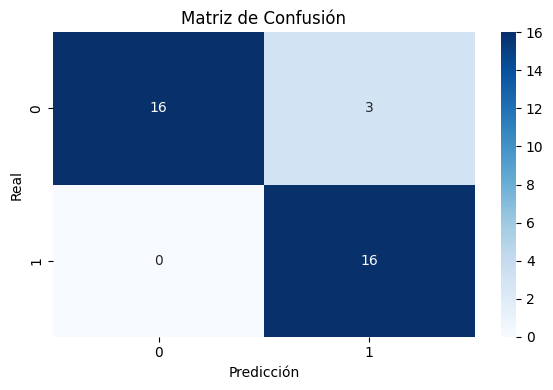

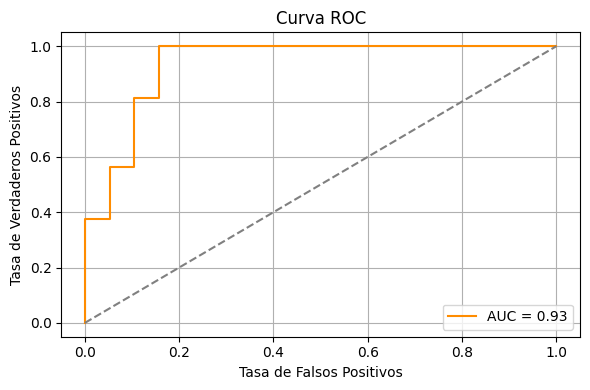


📈 Cross-Validation Accuracy: 0.8614 ± 0.0706


In [181]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_curve, auc, RocCurveDisplay
)
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

y = df['highGrade']

y_test = df_test['highGrade']

# =======================
# ENTRENAMIENTO SVM
# =======================
svm = SVC(probability=True)

param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3],
    'coef0': [0, 1]
}

grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_scaled_df, y)

best_svm = grid_search.best_estimator_
print("🔍 Mejores hiperparámetros:", grid_search.best_params_)

# =======================
# EVALUACIÓN EN TEST
# =======================
y_pred = best_svm.predict(X_test_scaled_df)
y_proba = best_svm.predict_proba(X_test_scaled_df)[:, 1]  # Probabilidad de clase positiva

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# =======================
# MATRIZ DE CONFUSIÓN
# =======================
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

# =======================
# CURVA ROC Y AUC
# =======================
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()

# =======================
# VALIDACIÓN CRUZADA
# =======================
scores = cross_val_score(best_svm, X_scaled, y, cv=5, scoring='accuracy')
print(f"\n📈 Cross-Validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")


In [182]:
import pickle
with open('../despliegue/botero-mlops-u2-main/backend/resources/svm_model.pkl', 'wb') as f:
    pickle.dump(best_svm, f)

In [183]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
best_k = 2
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans_final.fit_predict(X_all)




unique, counts = np.unique(clusters, return_counts=True)
cluster_balance = dict(zip(unique, counts))

print("Cluster balance:", cluster_balance)




df_cluster_comparison = pd.DataFrame({
    'cluster': clusters,
    'true_label': y_all.astype(int)  # Convert booleans to 0 (False) and 1 (True)
})

# Show how each cluster overlaps with true labels
cluster_vs_label = pd.crosstab(df_cluster_comparison['cluster'], df_cluster_comparison['true_label'])
print("Cluster vs. True Label:\n", cluster_vs_label)






Cluster balance: {0: 10, 1: 162}
Cluster vs. True Label:
 true_label   0   1
cluster           
0            2   8
1           91  71
